# Cooperação Internacional para o desenvolvimento do Complexo Econômico-Industrial Brasileiro
<p>Projeto Livre Reprograma curso Análise de Dados com Python </p>
<p>Aluna Cristiane Pereira</p>

<p><b>Introdução</b></p>
<p>Nesse notebook iremos mesclar e tratar as informações do CSV que será utilizado para responder as questões principais do projeto e gerar as primeiras visualizações.</p>
Perguntas e hipóteses exploratórias:
<ul>
<li>Quais são as condições da balança comercial em produtos de saúde para os países de interesse do estudo? Brasil, África do Sul, Índia, Argentina e México.</li>
<li>Quais produtos são importados/exportados por cada país?</li>
<li>Qual é a capacidade produtiva de IFA (Ingrediente Farmacêutico Ativo) de cada país?</li>
</ul>

<b>Importando os dados</b>

In [9]:
import pandas as pd

In [10]:
# Importando as bases de dados
df_Brazil_exports = pd.read_csv("Brazil-Pharmaceuticals-Exports.csv")
df_Brazil_imports = pd.read_csv("Brazil-Pharmaceuticals-Imports.csv")
df_Pharmaceutical_data = pd.read_csv("Pharmaceuticals-International-Trade-_parcial-data_.csv")

In [11]:
# Agora pretendo estudar como mesclar as bases de dados e preparar as colunas para as operações que desejo fazer
df_Pharmaceutical_data.columns

Index(['DESCRIPTION', 'COUNTRY', 'VALUE', 'YEAR', 'PARTNER', 'SOURCE'], dtype='object')

<b>Tratando os dados e dataframe final</b>

In [12]:
# Vou converter a coluna value para Float e a Year para datetime
# A conversão inicialmente deu errado, porque tem um dado incorreto na primeira linha do dataframe, vou substituí-lo, antes de converter
df_Pharmaceutical_data.iat[0,2] = "0.667"


In [13]:
#Verificando a alteração
df_Pharmaceutical_data.head(5)

,DESCRIPTION,COUNTRY,VALUE,YEAR,PARTNER,SOURCE
0,Urine bags imports (USD million),"South Africa, Eswatini and Kenya",0.667,2020.0,NaN,Medical Industries in Africa - A regional resp...
1,Imports medical technology %,South Africa,0.9,2018.0,NaN,Overview of the health technology sector in So...
2,Medical technological market (Rand billion),South Africa,350,2018.0,NaN,Overview of the health technology sector in So...
3,Medical technological market (Euros billion),South Africa,22,2018.0,NaN,Overview of the health technology sector in So...
4,Imports medical technology (Rand billion),South Africa,317,2018.0,NaN,Overview of the health technology sector in So...


In [14]:
# Deu um erro na conversão por causa de valores com vígula, ao invés de pontos, então voltei para substituir o caracter nas strings
df_Pharmaceutical_data['VALUE'] = df_Pharmaceutical_data['VALUE'].str.replace(',','.')

In [15]:
# Finalmente, a conversão para float
df_Pharmaceutical_data["VALUE"] = df_Pharmaceutical_data["VALUE"].astype(float)

In [16]:
# Próximo passo, a conversão para datetime da coluna Year
from datetime import datetime
df_Pharmaceutical_data["YEAR"] = pd.to_datetime(df_Pharmaceutical_data["YEAR"])

In [17]:
# Agora vou explorar os demais dataframes
df_Brazil_exports.columns

Index(['Segmentos', 'Type', 'Year', 'Total exports million USD',
       'Main exports destiny', 'Value exports main partner',
       'Partner share (%)'],
      dtype='object')

In [18]:
# Verificando quais colunas vou precisar converter
df_Brazil_exports.dtypes

Segmentos                      object
Type                           object
Year                            int64
Total exports million USD       int64
Main exports destiny           object
Value exports main partner      int64
Partner share (%)             float64
dtype: object

In [19]:
# Quero alterar o nome da coluna Segmentos para o inglês
df_Brazil_exports.rename(columns={"Segmentos": "Segments"}, inplace="True")

In [20]:
#Convertendo a colunar Year para datetime
df_Brazil_exports["Year"] = pd.to_datetime(df_Brazil_exports["Year"])

In [21]:
# Explorando o último dataframe
df_Brazil_imports.columns

Index(['Segments', 'Type', 'Year', 'Total Imports million U$S',
       'Main imports origin', 'Value imports main partner',
       'Partner share (%)'],
      dtype='object')

In [22]:
df_Brazil_imports.dtypes

Segments                       object
Type                           object
Year                            int64
Total Imports million U$S     float64
Main imports origin            object
Value imports main partner      int64
Partner share (%)             float64
dtype: object

In [23]:
# Preciso converter Year de int para datetime
df_Brazil_imports['Year'] = pd.to_datetime(df_Brazil_imports['Year'])

In [24]:
#Agora irei unir os dataframes, desejo manter o máximo de informações possível, então vou fazer um merge outer
df_Brazil_pharmaceuticals = pd.merge(df_Brazil_exports, df_Brazil_imports, how = "outer")

In [25]:
# Deu erro no merge final por causa da ausência de colunas com valores semelhantes, então vou voltei para verificar possibilidades de intersecção
df_Brazil_pharmaceuticals.columns

Index(['Segments', 'Type', 'Year', 'Total exports million USD',
       'Main exports destiny', 'Value exports main partner',
       'Partner share (%)', 'Total Imports million U$S', 'Main imports origin',
       'Value imports main partner'],
      dtype='object')

In [26]:
# Notei que preciso adicionar uma coluna para identificar os dados do Brasil
df_Brazil_pharmaceuticals["COUNTRY"] = "Brazil"

In [27]:
# Decidi alterar também o nome da coluna Year, para ficar igual ao da outra tabela
df_Brazil_pharmaceuticals.rename(columns={"Year": "YEAR"}, inplace="True")

In [28]:
# Finalmente a intersecção entre todas as tabelas
df_Pharmaceutical_market = pd.merge(df_Brazil_pharmaceuticals, df_Pharmaceutical_data, how="outer")

In [29]:
# Verificando o dataframe final
df_Pharmaceutical_market.describe()

,YEAR,Total exports million USD,Value exports main partner,Partner share (%),Total Imports million U$S,Value imports main partner,VALUE
count,223,51.000000,51.000000,101.000000,5.100000e+01,5.100000e+01,127.000000
mean,1970-01-01 00:00:00.000002020,110092.411765,22752.156863,0.302921,3.628574e+05,8.061020e+04,8141.767441
min,1970-01-01 00:00:00.000002017,1.000000,1.000000,0.107000,2.479000e+00,1.500000e+01,0.030000
25%,1970-01-01 00:00:00.000002020,189.000000,38.000000,0.210000,2.305000e+02,9.050000e+01,4.479000
50%,1970-01-01 00:00:00.000002020,17029.000000,5558.000000,0.269000,9.100000e+02,2.280000e+02,78.200000
75%,1970-01-01 00:00:00.000002021,73532.000000,22209.000000,0.330000,1.134970e+05,4.162150e+04,425.000000
max,1970-01-01 00:00:00.000002022,799762.000000,156420.000000,0.944000,6.689051e+06,1.304009e+06,180555.000000
std,NaN,205128.542042,39548.599033,0.138388,1.128619e+06,2.234440e+05,30492.875329


In [30]:
#Exportando o dataframe final
df_Pharmaceutical_market.to_csv("FinalDataFramePharmaceuticalMarket.csv")

<b>Primeiras visualizações</b>

<i><font color="green">Quais são as condições da balança comercial em produtos de saúde para os países de interesse do estudo? Brasil, África do Sul, Índia, Argentina e México?</font></i>

In [31]:
import matplotlib.pyplot as plt

In [32]:
# Vou testar primeiro o do Brasil
dataBrazil = df_Pharmaceutical_market[df_Pharmaceutical_market["COUNTRY"] == "Brazil"]
dataBrazil = dataBrazil[dataBrazil["YEAR"] == "1970-01-01 00:00:00.000002020"]
dataBrazil = dataBrazil[dataBrazil["Segments"] == 'Total de Dispositivos Medicos (DMs)']

In [33]:
# Descobrindo que outros filtros fazer
dataBrazil["Segments"].unique()

array(['Total de Dispositivos Medicos (DMs)'], dtype=object)

<i><font color="lightgreen">Primeira Visualização: Exportações versus Importações de produtos médicos pelo Brasil em 2020, em milhões de dólares</font></i>

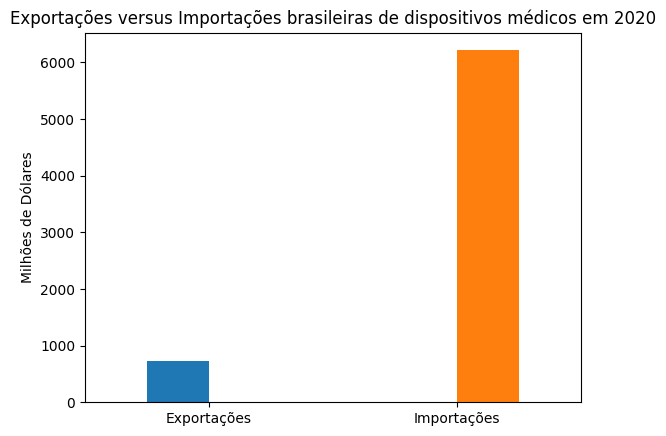

In [34]:
subtitle = ["Total exportações (USD mill)", "Total importações (USD mill)"]
dataBrazil.plot(x="Type", y=['Total exports million USD', 'Total Imports million U$S'], kind="bar")
plt.title("Exportações versus Importações brasileiras de dispositivos médicos em 2020")
plt.legend().remove()
plt.xlabel('')
plt.ylabel("Milhões de Dólares")
ticks, labels = plt.xticks()
plt.xticks(ticks, labels = ["Exportações", "Importações"], rotation=0);

<p><i><font color="gray">Insights</i></font></p>
Tal como previsto, o Brasil importa muito mais do que exporta produtos médicos, um indicativo da dependência externa. 

<i><font color="green">Quais produtos são importados/exportados por cada país?</font></i>

In [35]:
# Corrgindo o nome que identifiquei como errado abaixo
df_Pharmaceutical_market['Segments'] = df_Pharmaceutical_market['Segments'].str.replace('MobiliÃ¡rio','Mobiliario')

In [36]:
# Vou verificar quais produtos o Brasil importa
prodsBrazil = df_Pharmaceutical_market[df_Pharmaceutical_market["COUNTRY"] == "Brazil"]
prodsBrazil = prodsBrazil[prodsBrazil["YEAR"] == "1970-01-01 00:00:00.000002022"]
prodsBrazil = prodsBrazil[prodsBrazil["Total Imports million U$S"] != None]
prodsBrazil = prodsBrazil[prodsBrazil["Segments"] != "Total de Dispositivos medicos (DMs)"]
prodsBrazil.describe()


,YEAR,Total exports million USD,Value exports main partner,Partner share (%),Total Imports million U$S,Value imports main partner,VALUE
count,33,17.000000,17.000000,33.000000,16.000000,16.000000,0.0
mean,1970-01-01 00:00:00.000002022,152688.352941,33195.470588,0.304970,729.687500,172.875000,NaN
min,1970-01-01 00:00:00.000002022,1333.000000,808.000000,0.107000,43.000000,20.000000,NaN
25%,1970-01-01 00:00:00.000002022,16299.000000,4847.000000,0.205000,139.250000,62.250000,NaN
50%,1970-01-01 00:00:00.000002022,72132.000000,18340.000000,0.255000,349.500000,111.000000,NaN
75%,1970-01-01 00:00:00.000002022,171173.000000,35528.000000,0.318000,671.500000,196.250000,NaN
max,1970-01-01 00:00:00.000002022,799762.000000,156420.000000,0.794000,3851.000000,839.000000,NaN
std,NaN,232813.991652,46850.735604,0.144131,1024.509555,205.054099,NaN


In [37]:
prodsBrazil["Segments"].unique()
# Identifiquei que tem um produto com nome errado

array(['Total de Dispositivos Medicos (DMs)',
       'Materiais e equipamentos para a saude', 'Audiologia',
       'Cardiovascular',
       'Demais equip. de uso hospitalar - inclusive laser 59107',
       'Diagnostico por imagem e seus insumos',
       'Equip. e material de apoio - OPME',
       'Equipamentos de Protecao Individual (EPIs)',
       'Equipamentos para laboratorio',
       'Materiais e aparelhos para odontologia',
       'Materiais e suprimentos',
       'Mobiliario para uso odonto/medico/hospitalar', 'Oftalmologia',
       'OPME', 'Ortopedia', 'Reagentes para IVD',
       'Equipamentos e analisadores para IVD',
       'Demais equip. de uso hospitalar - inclusive laser'], dtype=object)

In [38]:
prodsBrazil.columns

Index(['Segments', 'Type', 'YEAR', 'Total exports million USD',
       'Main exports destiny', 'Value exports main partner',
       'Partner share (%)', 'Total Imports million U$S', 'Main imports origin',
       'Value imports main partner', 'COUNTRY', 'DESCRIPTION', 'VALUE',
       'PARTNER', 'SOURCE'],
      dtype='object')

In [39]:
# Tem muitos valores no gráfico, então quero pegar o top de produtos
prodsBrazil.sort_values(by="Total Imports million U$S", ascending=False, inplace=True)
prodsBrazil.reset_index(inplace=True)
prodsBrazil = prodsBrazil[0:16]

<i><font color="lightgreen">Segunda visualização: Importações brasileiras de produtos médicos em milhões de dólares (2022)</font></i>

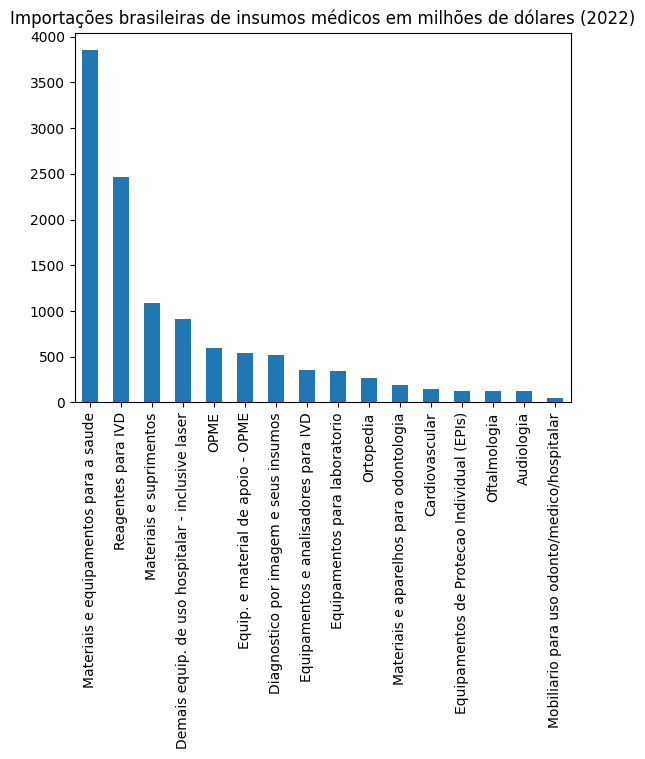

In [40]:
prodsBrazil.plot(x="Segments", y="Total Imports million U$S", kind="bar")
plt.legend().remove()
plt.xlabel("")
plt.title("Importações brasileiras de insumos médicos em milhões de dólares (2022)");

<p><i><font color="gray">Insights</i></font></p>
O Brasil é bastante dependente (top 5) em materiais e equipamentos em geral, reagentes e equipamentos de IVD, equipamentos hospitalares, OPME, equipamentos para diagnóstico por imagem e seus insumos. 

<i><font color="green">Qual é a capacidade produtiva de IFA (Ingrediente Farmacêutico Ativo) de cada país?</font></i>

In [41]:
# Lembro que só consegui dados sobre a produção de IFA em dois países: Brasil e India
APIprod = df_Pharmaceutical_market[df_Pharmaceutical_market["DESCRIPTION"] == "API production"]
APIprod = APIprod[APIprod["COUNTRY"] != "Several"]
APIprod

,Segments,Type,YEAR,Total exports million USD,Main exports destiny,Value exports main partner,Partner share (%),Total Imports million U$S,Main imports origin,Value imports main partner,COUNTRY,DESCRIPTION,VALUE,PARTNER,SOURCE
207,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil,API production,124.0,NaN,NaN
210,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,API production,500.0,NaN,NaN


<i><font color="lightgreen">Terceira visualização: comparação Brasil e India na produção de API</font></i>

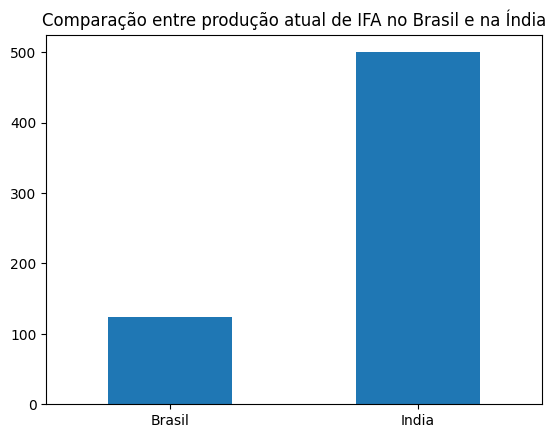

In [42]:
APIprod.plot(x="COUNTRY", y="VALUE", kind="bar")
plt.legend().remove()
plt.xlabel("")
plt.title("Comparação entre produção atual de IFA no Brasil e na Índia")
ticks, labels = plt.xticks()
plt.xticks(ticks, labels = ["Brasil", "India"], rotation=0);

<p><i><font color="gray">Insights</i></font></p>
A India produz mais do que o dobro de IFAs que o Brasil, portanto é um potencial parceiro interessante para investigar formas de haver transferência de tecnologia. 

## Conclusões
Desejo preencher algumas lacunas nos dados antes de gerar as visualizações finais no Tableau, mas já é possível identificar quais são as principais necessidades do Brasil na cooperação internacional em insumos médicos assim como potenciais parceiros. Na próxima fase, pretendo explorar mais os dados da India e dos demais países, assim como gerar visualizações mais sofisticadas. 